In [42]:
from skimage import feature, exposure
import matplotlib.pyplot as plt
import cv2
import os
import random

In [36]:
def quantify_image(image_path):
	image = cv2.imread(image_path)
	image = preprocess_image(image)
	# compute the histogram of oriented gradients feature vector for the input image
	features = feature.hog(image, orientations=9,
		pixels_per_cell=(10, 10), cells_per_block=(2, 2),
		transform_sqrt=True, block_norm="L1", visualize=True)
	# return the feature vector
	print(len(features))
	input()
	return features

In [37]:
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))

    # Apply Otsu's thresholding
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    return image

In [ ]:
def show_feature(image_path):
  image = cv2.imread(image_path)

  print("Original image")
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()

  image = preprocess_image(image)

  (H, hogImage) = feature.hog(image, orientations=9,
		pixels_per_cell=(10, 10), cells_per_block=(2, 2),
		transform_sqrt=True, block_norm="L1",
	  visualize=True)
  
  hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
  hogImage = hogImage.astype("uint8")54
  
  print("After hog filter applied")
  plt.imshow(hogImage, cmap='gray')
  plt.axis('off')
  plt.show()

Absolute path: c:\Coding\parkinsons-detection\data\processed\dataset_1\spiral\training\parkinson
Found image files: ['AUG_horizontal_flip_V01PE02.png', 'AUG_horizontal_flip_V01PE03.png', 'AUG_horizontal_flip_V02PE02.png', 'AUG_horizontal_flip_V02PE03.png', 'AUG_horizontal_flip_V03PE02.png', 'AUG_horizontal_flip_V03PE03.png', 'AUG_horizontal_flip_V03PE05.png', 'AUG_horizontal_flip_V03PE06.png', 'AUG_horizontal_flip_V03PE08.png', 'AUG_horizontal_flip_V03PE09.png', 'AUG_horizontal_flip_V04PE02.png', 'AUG_horizontal_flip_V04PE03.png', 'AUG_horizontal_flip_V05PE02.png', 'AUG_horizontal_flip_V05PE03.png', 'AUG_horizontal_flip_V06PE02.png', 'AUG_horizontal_flip_V06PE03.png', 'AUG_horizontal_flip_V07PE02.png', 'AUG_horizontal_flip_V07PE03.png', 'AUG_horizontal_flip_V08PE02.png', 'AUG_horizontal_flip_V08PE03.png', 'AUG_horizontal_flip_V09PE02.png', 'AUG_horizontal_flip_V09PE03.png', 'AUG_horizontal_flip_V10PE01.png', 'AUG_horizontal_flip_V10PE02.png', 'AUG_horizontal_flip_V11PE01.png', 'AUG_hor

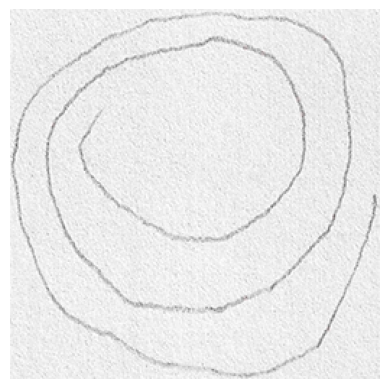

After hog filter applied


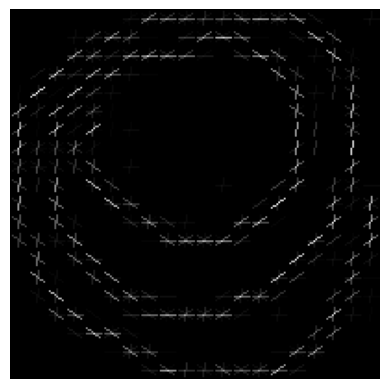

In [49]:
img_dir = '../data/processed/dataset_1/spiral/training/parkinson'


# Print absolute path for debugging
print("Absolute path:", os.path.abspath(img_dir))

# Check if directory exists
if not os.path.isdir(img_dir):
    print("Directory does not exist!")
else:
    img_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print("Found image files:", img_files)
    if not img_files:
        print("No image files found in directory.")
    else:
        img_path = os.path.join(img_dir, random.choice(img_files))
        show_feature(img_path)
